In [1]:
#Нейро-нечеткие системы
#Лабораторная работа №5

#Задача: классификация текстов

In [2]:
#мешок слов

%matplotlib inline
import os

from ipywidgets import Select, SelectMultiple, interactive,  Layout, Box, Label

from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
import sklearn.metrics as metrics

import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
#import seaborn as sns
## for processing
import re
from sklearn.model_selection import train_test_split
import sklearn.feature_selection 
import nltk
#перед использованием раскомментировать
#nltk.download("stopwords")
#nltk.download('wordnet')

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential, Model
from keras.layers import Dense, Input, Activation, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import models

In [4]:
##!pip install gensim==3.4.0
##!pip install smart_open==1.9.0
#import gensim

In [5]:
#поиск всех файлов в папке
files = []
for file in os.listdir("./datasets"):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('raw_text.csv', 'stars.csv', 'test.csv', 'train.csv'), value='raw_…

In [6]:
#оригинальный датасет
df = pd.read_csv("./datasets/" + fileselect.value, delimiter=",")
df.head(10)

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
5,4,Open Letter Against British Copyright Indoctri...,The British Department for Education and Skill...
6,4,Loosing the War on Terrorism,"\\""Sven Jaschan, self-confessed author of the ..."
7,4,"FOAFKey: FOAF, PGP, Key Distribution, and Bloo...",\\FOAF/LOAF and bloom filters have a lot of i...
8,4,E-mail scam targets police chief,"Wiltshire Police warns about ""phishing"" after ..."
9,4,"Card fraud unit nets 36,000 cards","In its first two years, the UK's dedicated car..."


In [7]:
#выбрать столбец, который будет отвечать за тип
yselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
yselect

Select(description='Select file:', options=('Class Index', 'Title', 'Description'), value='Class Index')

In [8]:
#выбрать столбец, который будет отвечать за текст
xselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
xselect

Select(description='Select file:', options=('Class Index', 'Title', 'Description'), value='Class Index')

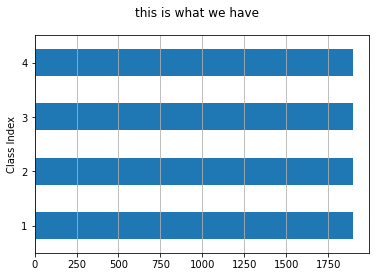

In [9]:
#просто смотрим какие у нас есть лейблы
fig, ax = plt.subplots()
fig.suptitle("this is what we have", fontsize=12)
df[yselect.value].reset_index().groupby(yselect.value).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [10]:
x = df[xselect.value].copy()
y = df[yselect.value].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
from keras.preprocessing import text, sequence
#здесь тот же Bag of Words
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [12]:
tokenize.fit_on_texts(x_train) 
x_train = tokenize.texts_to_matrix(x_train)
x_test = tokenize.texts_to_matrix(x_test)

In [13]:
x_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [14]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [17]:
y_train

array([0, 1, 1, ..., 1, 3, 3], dtype=int64)

In [18]:
from keras import utils
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [26]:
batch_size = 32
epochs = 20

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_5 (Activation)    (None, 4)                 0         
Total params: 514,564
Trainable params: 514,564
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, validation_split=0.1)

Epoch 1/20
150/150 [==============================] - 1s 8ms/step - loss: 0.7375 - accuracy: 0.7485 - val_loss: 0.4680 - val_accuracy: 0.8346
Epoch 2/20
150/150 [==============================] - 1s 6ms/step - loss: 0.3606 - accuracy: 0.8755 - val_loss: 0.4702 - val_accuracy: 0.8327
Epoch 3/20
150/150 [==============================] - 2s 11ms/step - loss: 0.2376 - accuracy: 0.9229 - val_loss: 0.5112 - val_accuracy: 0.8383
Epoch 4/20
150/150 [==============================] - 2s 11ms/step - loss: 0.1514 - accuracy: 0.9591 - val_loss: 0.5755 - val_accuracy: 0.8233
Epoch 5/20
150/150 [==============================] - 2s 11ms/step - loss: 0.0921 - accuracy: 0.9827 - val_loss: 0.6317 - val_accuracy: 0.8177
Epoch 6/20
150/150 [==============================] - 2s 12ms/step - loss: 0.0540 - accuracy: 0.9935 - val_loss: 0.6842 - val_accuracy: 0.8214
Epoch 7/20
150/150 [==============================] - 1s 8ms/step - loss: 0.0321 - accuracy: 0.9985 - val_loss: 0.7341 - val_accuracy: 0.8233
Ep

In [23]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

72/72 [==============================] - 0s 5ms/step - loss: 1.2531 - accuracy: 0.7855
Test accuracy: 0.7855263352394104
